<a href="https://colab.research.google.com/github/maitri-7/DaLab/blob/main/EXP1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/maitri-7/DaLab/main/data/IT%20Salary%20Survey%20EU%20%202020.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Timestamp                                                                                                                1253 non-null   object 
 1   Age                                                                                                                      1226 non-null   float64
 2   Gender                                                                                                                   1243 non-null   object 
 3   City                                                                                                                     1253 non-null   o

In [ ]:
df.shape

(1253, 23)

In [ ]:
df.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


In [ ]:
# dorp unuseful columns:

df = df.drop(columns = ['Annual bonus+stocks one year ago. Only answer if staying in same country',
                        'Have you lost your job due to the coronavirus outbreak?', 
                        'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
                        'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR',
                        'Timestamp','Years of experience in Germany',
                        'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
                        'Annual bonus+stocks one year ago. Only answer if staying in same country','Yearly bonus + stocks in EUR',
                        'Other technologies/programming languages you use often','Main language at work',
                        'Seniority level','Сontract duration'])
# rename columns:

df.rename(columns = {'Your main technology / programming language': 'Main technology', 'Position ': 'Position', 
                     'Yearly brutto salary (without bonus and stocks) in EUR': 'salary', 'Number of vacation days': 'VacationDays', 
                     'Yearly bonus + stocks in EUR':'Yearly bonus',
                     'Total years of experience': 'experience' }, inplace = True)

In [ ]:
df.head()


,Age,Gender,City,Position,experience,Main technology,salary,VacationDays,Employment status,Company size,Company type
0,26.0,Male,Munich,Software Engineer,5,TypeScript,80000.0,30,Full-time employee,51-100,Product
1,26.0,Male,Berlin,Backend Developer,7,Ruby,80000.0,28,Full-time employee,101-1000,Product
2,29.0,Male,Berlin,Software Engineer,12,Javascript / Typescript,120000.0,30,Self-employed (freelancer),101-1000,Product
3,28.0,Male,Berlin,Frontend Developer,4,Javascript,54000.0,24,Full-time employee,51-100,Startup
4,37.0,Male,Berlin,Backend Developer,17,C# .NET,62000.0,29,Full-time employee,101-1000,Product


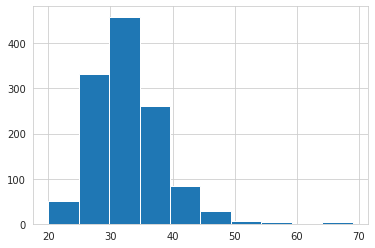

Number of null values: 0
count    1253.000000
mean       31.809258
std         7.327212
min         0.000000
25%        28.000000
50%        32.000000
75%        35.000000
max        69.000000
Name: Age, dtype: float64
0       26
1       26
2       29
3       28
4       37
        ..
1248    31
1249    33
1250    39
1251    26
1252    26
Name: Age, Length: 1253, dtype: int64


In [ ]:
df['salary'] = df['salary'].astype(int)

# Inspect age column
df.Age.hist()
plt.show()

# converting the datatype of age to int
df['Age'] = df['Age'].fillna(0).astype(int)
print(f'Number of null values: {df.Age.isnull().sum()}')
print(df.Age.describe())
# replace the null age values with mode 
print(df.Age.fillna(df.Age.mode()))


In [ ]:
df['Company size'].isna().sum()
df = df[df['Company size'].notna()]
df['Company size'].unique()

array(['51-100', '101-1000', '11-50', '1000+', 'up to 10'], dtype=object)

In [ ]:
# Standard deviation is high, and there are only 16 na values
# Drop missing values instead of using average
print(f'Number of Null values: {df.experience.isna().sum()}')
df = df[~df.experience.isna()].reset_index(drop=True)
df['experience'] = pd.to_numeric(df['experience'], errors = 'coerce').fillna(0).astype(int)
df.experience.describe()

Number of Null values: 9


count    1226.000000
mean        9.036705
std        11.929841
min         0.000000
25%         5.000000
50%         8.000000
75%        12.000000
max       383.000000
Name: experience, dtype: float64

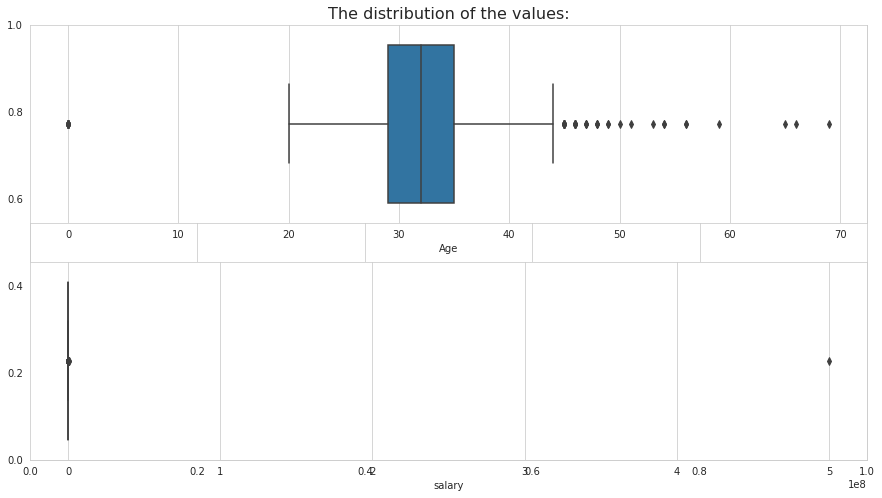

In [ ]:
# the distribution of the values:
fig = plt.figure(figsize= (15, 8))
plt.title('The distribution of the values:', fontsize= 16)
axs = fig.subplots(nrows=2, ncols= 1)
sns.boxplot(data = df, x= 'Age', ax=axs[0])
sns.boxplot(data = df, x= 'salary',ax = axs[1])
plt.show()

In [ ]:
# As we can see there are extreme salary outliers so we will drop them
df['salary'].sort_values()

961         10001
863         10001
360         10164
1112        11500
665         12000
          ...    
787        240000
616        250000
562        300000
761        850000
834     500000000
Name: salary, Length: 1226, dtype: int64

In [ ]:
df = df.drop(index = [834,761])

In [ ]:
df['Age'].sort_values()

884      0
1040     0
326      0
27       0
940      0
        ..
1136    56
22      59
292     65
57      66
1080    69
Name: Age, Length: 1224, dtype: int64

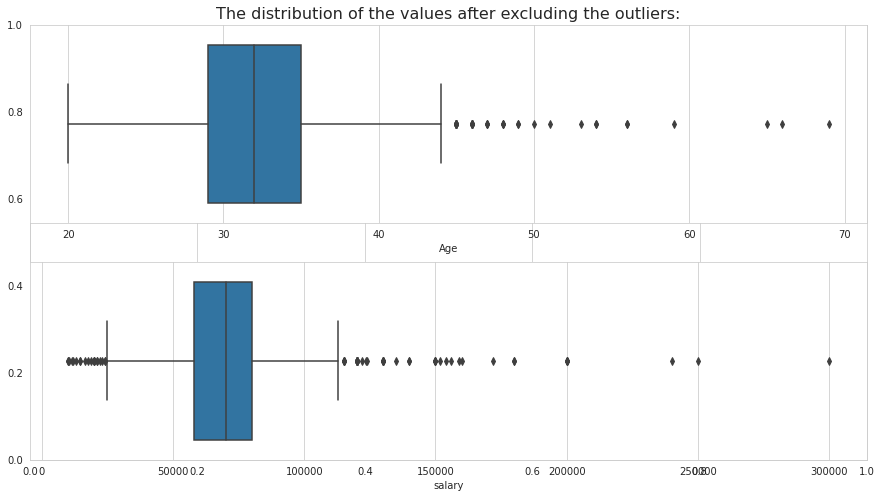

787     20
961     22
711     22
345     22
1076    22
        ..
1136    56
22      59
292     65
57      66
1080    69
Name: Age, Length: 1207, dtype: int64


In [ ]:
# the distribution of the values after excluding the outliers:

df= df[df['Age'] != 0]
fig = plt.figure(figsize= (15, 8))
plt.title('The distribution of the values after excluding the outliers:', fontsize= 16)
axs = fig.subplots(nrows=2, ncols= 1)
sns.boxplot(data = df, x= 'Age', ax = axs[0])
sns.boxplot(data = df, x= 'salary',ax = axs[1])
plt.show()
print(df['Age'].sort_values())

# **Univariate Plotting**

(0.0, 40.0)

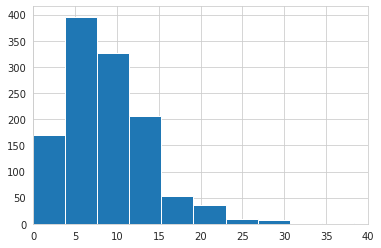

In [ ]:
df.experience.hist(bins=100).set_xlim((0,40))

As we can see from the above plot we have set the limits for x axis from 0 to 40 to better visualize the data. The companies might have more employees whose experience is between 5 to 10.


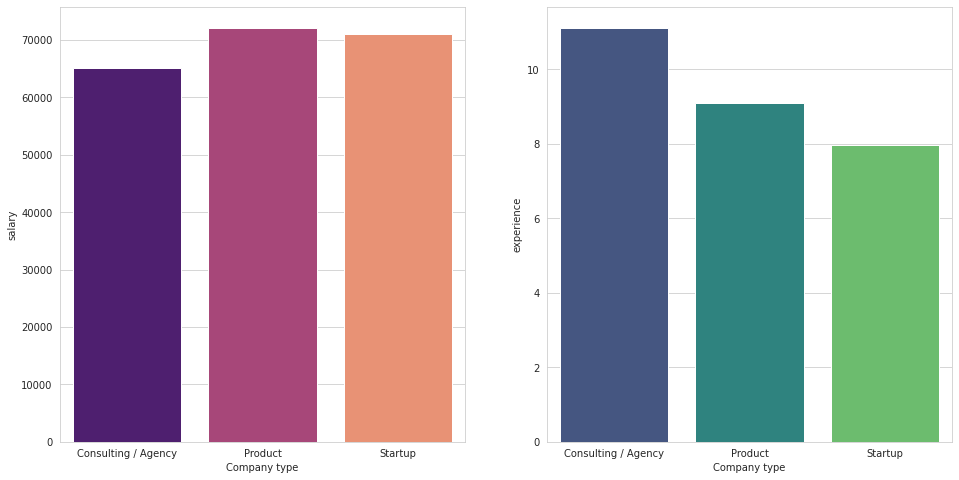

In [ ]:
# the relationship between the company type and the other features:
company = df.loc[df['Company type'].isin(['Product', 'Startup', 'Consulting / Agency'])]
company_type = company.groupby('Company type', as_index= False).mean()

fig = plt.figure(figsize= (16, 8))
axs = fig.subplots(nrows=1, ncols= 2)
sns.barplot(data = company_type, x= 'Company type', y = 'salary', ax = axs[0], palette= 'magma')
sns.barplot(data = company_type, x= 'Company type', y = 'experience', ax = axs[1], palette = 'viridis')
plt.show()

The 'Consulting/Agency' companies require higher years of experience and pay the lowest salary.

# **Bivariate Plotting**

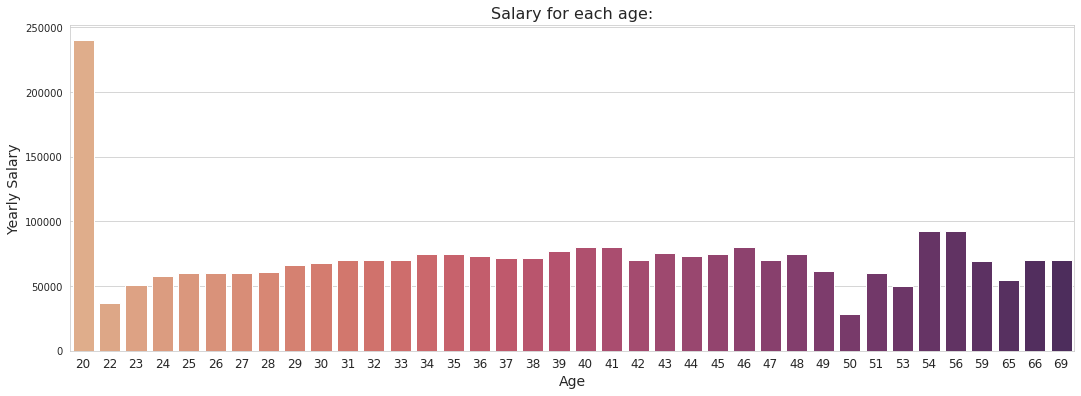

In [ ]:
# the Average salary for each age

age_salary = df.groupby('Age', as_index = False).median()
plt.figure(figsize=(18, 6))
sns.barplot(data= age_salary, x= 'Age', y= 'salary',palette= 'flare')
plt.title('Salary for each age:', fontsize= 16)
plt.xlabel('Age', fontsize= 14)
plt.ylabel('Yearly Salary', fontsize = 14)
plt.xticks(fontsize= 12)
plt.show()

Here, we have calculated the salary of each age group present in the dataset and as we can see the average salary for age group 20 is maximum than the rest of the age groups.

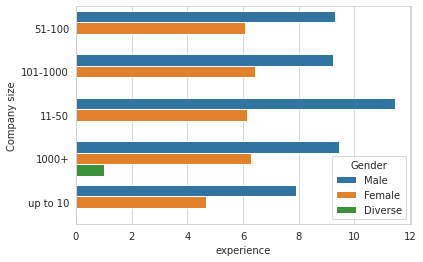

In [ ]:
sns.barplot(data=df, x="experience", y="Company size", hue="Gender",ci=None)

From the above chart we can say that, there is a diversity in the gender when the company size is large. Also, all the companies required higher years of experience for males as compared to females.

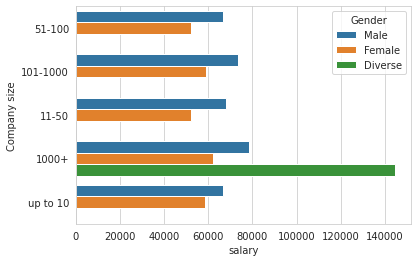

In [ ]:
sns.barplot(data=df, x="salary", y="Company size", hue="Gender",ci=None)

From the above chart we can say that, in general except for when the company size is large, the salary for males is higher as compared to female. And for the large company, salary for "Diverse" gender is the highest

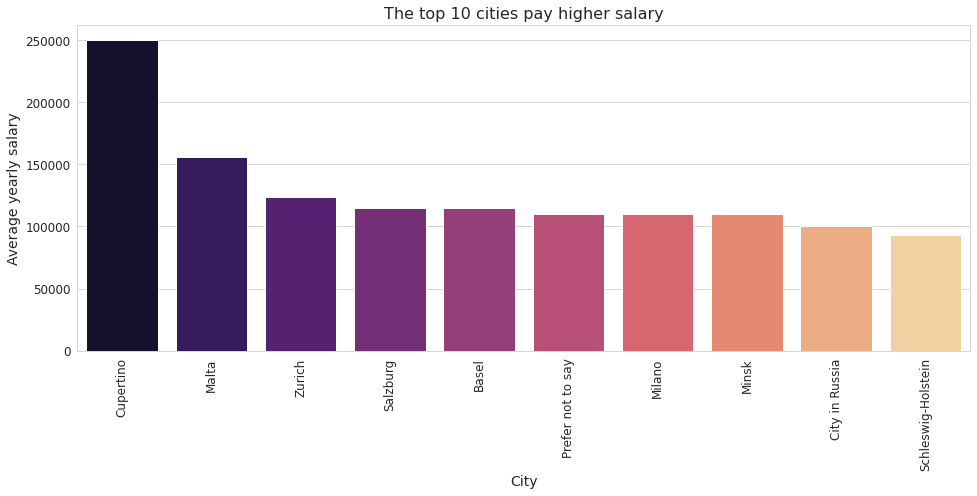

In [ ]:
# The top 10 cities pay the higher salary:

salary_city = df.groupby('City', as_index= False).mean().sort_values('salary', ascending = False) # sort cities according to the salary
salary_city

salary_city = salary_city.head(10)
plt.figure(figsize = (16,6))
ax = sns.barplot(data= salary_city, x= 'City', y= 'salary',palette= 'magma')
plt.title('The top 10 cities pay higher salary', fontsize= 16)
plt.xlabel('City', fontsize = 14)
plt.ylabel('Average yearly salary', fontsize= 14)
plt.xticks(fontsize= 12, rotation= 90)
plt.yticks(fontsize = 12)
plt.show()

From the above barplot we can infere that Cupertino city might be best for IT developers in terms of salary

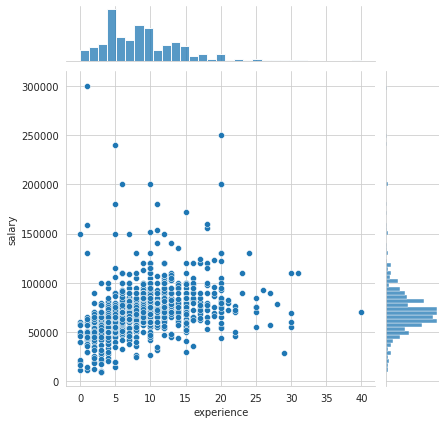

In [ ]:
df['experience'].sort_values()
df = df.drop(index = [1080])
sns.jointplot(data=df, x="experience", y="salary")


From the above chart we can say that the salary increases as experience increases and it keeps increasing until 10 years of experience and then we can see a slight decline as experience increases further